In [1]:
ppath = 'C:/Users/kople/Documents/Work/RA/data/processed/sess1819sem2/'
path = 'C:/Users/kople/Documents/Work/RA/data/raw/sess1819sem2/'
plots_path = 'C:/Users/kople/Documents/Work\RA/Student-Engagement_Prediction/plots'

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import kaleido
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from tqdm.notebook import tqdm_notebook,trange
from tqdm import tqdm
from time import sleep
from functools import reduce

In [3]:
final = pd.read_feather(f'{ppath}final.feather')

In [4]:
final

,userid,firstname,lastname,email,idnumber,institution,department,number_of_logins,number_of_sessionids,number_of_courseids,...,question_attempts,questionnaire_max_attempts,questionnaire_min_attempts,questionnaire_mean_attempts,number_of_quizs,quiz_max_attempt,quiz_min_attempt,quiz_mean_attempt,number_of_surveys,number_of_questions
0,64,Kunalkumar A/l Poobathy,.,kunalkumar@siswa.um.edu.my,WIF160010,None,None,168.0,2.0,2.0,...,24.0,NaN,NaN,NaN,3.0,2.0,1.0,1.25,NaN,NaN
1,65,Prabbananthen A/l Santhra Mohan,.,prabba@siswa.um.edu.my,WIF160052,None,None,88.0,1.0,2.0,...,27.0,NaN,NaN,NaN,3.0,2.0,1.0,1.40,NaN,NaN
2,66,Muhammad Shazwar Bin Anuar,.,shazwar.a@siswa.um.edu.my,WIE160015,None,None,147.0,NaN,2.0,...,27.0,NaN,NaN,NaN,1.0,1.0,1.0,1.00,NaN,NaN
3,67,Syaza Izzati Binti Ibrahim,.,syazaizzati@siswa.um.edu.my,WIC160061,None,None,115.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68,Bryan Raj A/l Peter Jabaraj,.,bryanraj@siswa.um.edu.my,WIC160008,None,None,208.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24539,28221,Dr Aminah Jalil,.,aminahjalil85@siswa.um.edu.my,DGD150002,None,None,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24540,28230,Li Mei,.,ava180067@siswa.um.edu.my,AVA180067,None,None,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24541,28233,Muhammad Izz Syahmi Bin Kamarul Arifin,.,fae190063@siswa.um.edu.my,FAE190063,None,None,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24542,28234,Soon Wan Fei,.,fellowship87@siswa.um.edu.my,ROA160001,None,None,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

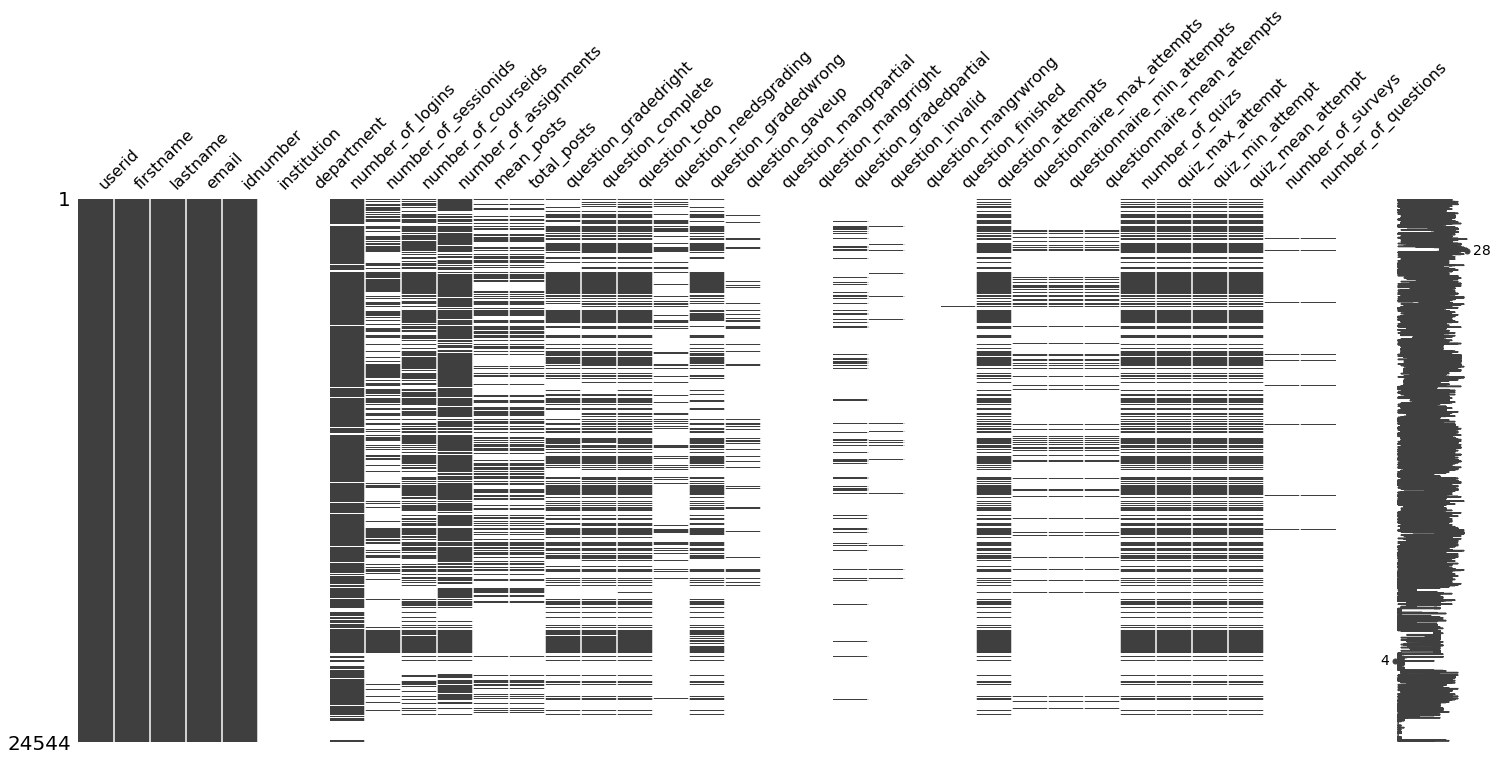

In [5]:
msno.matrix(final)

In [6]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24544 entries, 0 to 24543
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   userid                       24544 non-null  int64  
 1   firstname                    24544 non-null  object 
 2   lastname                     24544 non-null  object 
 3   email                        24544 non-null  object 
 4   idnumber                     24542 non-null  object 
 5   institution                  48 non-null     object 
 6   department                   71 non-null     object 
 7   number_of_logins             21550 non-null  float64
 8   number_of_sessionids         8918 non-null   float64
 9   number_of_courseids          13860 non-null  float64
 10  number_of_assignments        17131 non-null  float64
 11  mean_posts                   8755 non-null   float64
 12  total_posts                  8755 non-null   float64
 13  question_gradedr

# Assignment analysis

In [7]:
final.number_of_assignments.describe()

count    17131.000000
mean         9.666569
std         10.712633
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max         90.000000
Name: number_of_assignments, dtype: float64

In [8]:
final.mean_posts.describe()

count    8755.000000
mean        1.176659
std         0.957741
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        21.000000
Name: mean_posts, dtype: float64

In [9]:
final.loc[final.firstname.str.contains('Azraf')|final.firstname.str.contains('Rahmani')]

,userid,firstname,lastname,email,idnumber,institution,department,number_of_logins,number_of_sessionids,number_of_courseids,...,question_attempts,questionnaire_max_attempts,questionnaire_min_attempts,questionnaire_mean_attempts,number_of_quizs,quiz_max_attempt,quiz_min_attempt,quiz_mean_attempt,number_of_surveys,number_of_questions
15015,16304,Azraf Kabir,.,wid170711@siswa.um.edu.my,WID170711,None,None,149.0,3.0,4.0,...,524.0,NaN,NaN,NaN,12.0,2.0,1.0,1.25,NaN,NaN
15304,16596,Abdolraouf Rahmani,.,kie170720@siswa.um.edu.my,KIE170720,None,None,203.0,8.0,2.0,...,231.0,NaN,NaN,NaN,3.0,1.0,1.0,1.00,NaN,NaN
15848,17156,Alifa Rahmania,.,nex180152@siswa.um.edu.my,NEX180152,None,None,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Anonymization

## Creating fake userid's

In [10]:
userid_column_length = len(final.userid)

In [11]:
final['userid']= np.arange(1,userid_column_length+1)

In [12]:
final.head()

,userid,firstname,lastname,email,idnumber,institution,department,number_of_logins,number_of_sessionids,number_of_courseids,...,question_attempts,questionnaire_max_attempts,questionnaire_min_attempts,questionnaire_mean_attempts,number_of_quizs,quiz_max_attempt,quiz_min_attempt,quiz_mean_attempt,number_of_surveys,number_of_questions
0,1,Kunalkumar A/l Poobathy,.,kunalkumar@siswa.um.edu.my,WIF160010,None,None,168.0,2.0,2.0,...,24.0,NaN,NaN,NaN,3.0,2.0,1.0,1.25,NaN,NaN
1,2,Prabbananthen A/l Santhra Mohan,.,prabba@siswa.um.edu.my,WIF160052,None,None,88.0,1.0,2.0,...,27.0,NaN,NaN,NaN,3.0,2.0,1.0,1.40,NaN,NaN
2,3,Muhammad Shazwar Bin Anuar,.,shazwar.a@siswa.um.edu.my,WIE160015,None,None,147.0,NaN,2.0,...,27.0,NaN,NaN,NaN,1.0,1.0,1.0,1.00,NaN,NaN
3,4,Syaza Izzati Binti Ibrahim,.,syazaizzati@siswa.um.edu.my,WIC160061,None,None,115.0,10.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bryan Raj A/l Peter Jabaraj,.,bryanraj@siswa.um.edu.my,WIC160008,None,None,208.0,18.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing personal id columns

In [13]:
final.drop(['firstname','lastname','email','institution','department'],axis=1,inplace=True)

In [14]:
final

,userid,idnumber,number_of_logins,number_of_sessionids,number_of_courseids,number_of_assignments,mean_posts,total_posts,question_gradedright,question_complete,...,question_attempts,questionnaire_max_attempts,questionnaire_min_attempts,questionnaire_mean_attempts,number_of_quizs,quiz_max_attempt,quiz_min_attempt,quiz_mean_attempt,number_of_surveys,number_of_questions
0,1,WIF160010,168.0,2.0,2.0,17.0,1.0,8.0,3.0,8.0,...,24.0,NaN,NaN,NaN,3.0,2.0,1.0,1.25,NaN,NaN
1,2,WIF160052,88.0,1.0,2.0,13.0,NaN,NaN,4.0,9.0,...,27.0,NaN,NaN,NaN,3.0,2.0,1.0,1.40,NaN,NaN
2,3,WIE160015,147.0,NaN,2.0,26.0,1.0,2.0,3.0,9.0,...,27.0,NaN,NaN,NaN,1.0,1.0,1.0,1.00,NaN,NaN
3,4,WIC160061,115.0,10.0,1.0,32.0,1.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WIC160008,208.0,18.0,1.0,35.0,1.0,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24539,24540,DGD150002,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24540,24541,AVA180067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24541,24542,FAE190063,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24542,24543,ROA160001,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

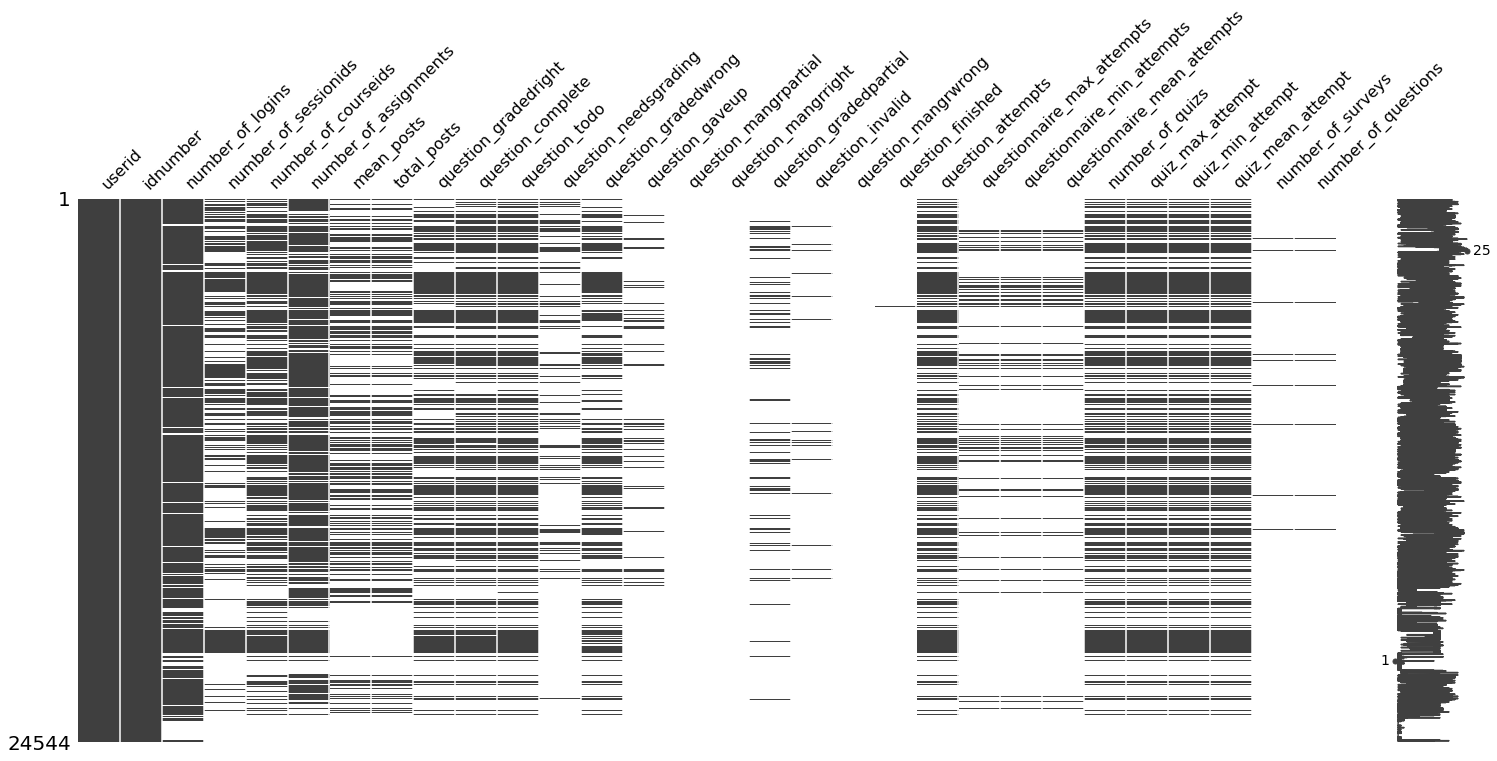

In [15]:
msno.matrix(final)